## Caracterización y elección de modelos.


La diabetes es una enfermedad que se presenta cuando el nivel de glucosa en la sangre se eleva, lo que en última instancia conduce a otros problemas de salud como enfermedades cardíacas, enfermedades renales, etc. La diabetes se debe principalmente al consumo de alimentos altamente procesados, malos hábitos de consumo, etc. Según la Organización Mundial de la Salud, el número de personas con diabetes ha aumentado con los años.


Un hospital quiere aplicar herramientas de análisis de datos para mejorar el diagnóstico de esta enfemedad, y aprovechar al máximo los recursos que tiene (es decir, los médicos).

Este hopital provee una base de datos con numerosos datos/estudios de pacientes, algunos de ellos con diabetes y otros a quienes los médicos escartaron que tienen esa enfermedad. Lo que al hospital le interesa es que utilicen esta base de datos para identificar <b> pacientes con riesgo </b> de tener diabetes. Una vez identificados, el diagnóstico se efectuará por un médico de carne y hueso. 

Para efectuar esta tarea, los estudiantes de Acámica deberán desarrollar un protocolo de Machine Learning. Pero antes, deben pensar los objetivos de ese protocolo en función de los requerimientos del Hospital. Por ejemplo:
1. ¿Conviene elegir el algoritmo de ML que más score tiene? ¿O conviene elegir un modelo un poco peor, pero que tega pocos falsos negativos? ¿O falsos positivos?
1. ¿Conviene usar un test_set? ¿O conviene usar todos los datos para entrenar el algoritmo?


<b> Se elige del mejor modelo. </b> En función de las métricas que obtuvieron para cada modelo, elegir el mejor según lo requerido por el Hospital. Discutir y justificar POR ESCRITO lo que pensaron a la hora de elegirlo. 


### Preparación del Data Set

In [70]:
# Carga de librerias
import pandas as pd
import numpy as np
import sklearn 
import warnings
warnings.filterwarnings('ignore')



In [3]:
df =  pd.read_csv('dataset/acamica_clase33_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Buscamos posibles valores NAN y cualquier descripción del dataset que nos permita conocer su distribucion y datos.

In [5]:
missing_values_count =df.isna().sum()
missing_values_count


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


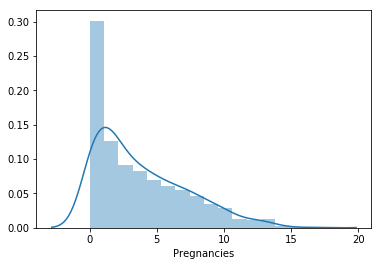

In [8]:
# Busqueda de outliers
import seaborn as sns

sns.distplot(df.Pregnancies)


La cantidad de embarazos entre los pacientes varia de 0 a 20, aunque los casos extremos son atipicos, los consideramos dentro de los datos a fín de no disminuir el data set.


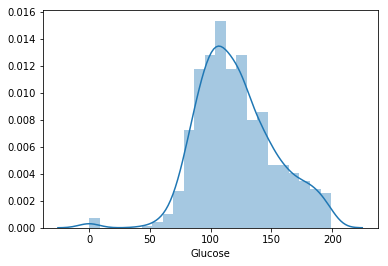

In [9]:
sns.distplot(df.Glucose)

Los datos en el limite de glucose igual a cero corresponden a datos no medidos en el historial medico, ya que se fisicamente son imposibles, por lo cual a fín de evitar que influyan en el entrenamiento seran reemplazados por la media.

In [9]:
mean_G = df.Glucose.mean()
df.Glucose = df.Glucose.replace(0, mean_G)


In [10]:
# Cantidad de datos iguales a cero.
def Zeros(Glucose):
    return len(df[Glucose == 0])
Glucose = df.Glucose
Zeros(Glucose)

0

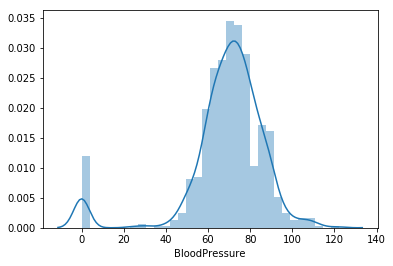

In [11]:
# Datos Presión Sanguinea

sns.distplot(df.BloodPressure)

In [12]:
#Reemplazo de datos en cero, presión sanguinea igual a cero solo si el corazon deja de bombear sangre
mean_B = df.BloodPressure.mean()

df.BloodPressure = df.BloodPressure.replace(0,mean_B)


In [13]:
#Cantidad de datos en cero
def Zeros(BloodPressure):
    return len(df[BloodPressure == 0])
BloodPressure = df.BloodPressure

Zeros(BloodPressure)

0

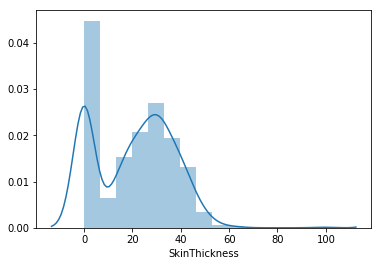

In [14]:
# Espesor de la Piel
sns.distplot(df.SkinThickness)

Asumiremos los ceros de este parametro como una No Medición, por lo que se reemplazaran por la media,esto debido a la imposibilidad de un resultado de medición igual a cero.


In [15]:
#Reemplazo de datos en cero
mean_S = df.SkinThickness.mean()
df.SkinThickness = df.SkinThickness.replace(0,mean_S)


In [16]:
#Cantidad de ceros 
def Zeros(SkinThickness):
    return len(df[SkinThickness == 0])
SkinThickness = df.SkinThickness
Zeros(SkinThickness)

0

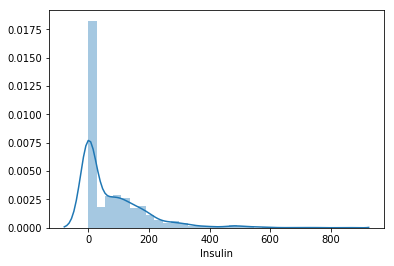

In [17]:
#Insulin 
sns.distplot(df.Insulin)

In [18]:
#Ceros en Insulin
def Zeros(Insulin):
    return len(df[Insulin == 0])
Insulin = df.Insulin

Zeros(Insulin)

374

In [19]:
print (' La cantidad de datos igual a cero representa : ' , Zeros(Insulin)/ df.shape[ 0 ] *100 ,'% de la data') 


 La cantidad de datos igual a cero representa :  48.69791666666667 % de la data


Como los datos en cero representan en 48,6% del total, se pueden evaluar dos opciones, eliminar esta columna de datos o hacer reemplazo de estos, en cualquiera de los casos la influencia de esta variable con respecto a la predicción no sera confiable.

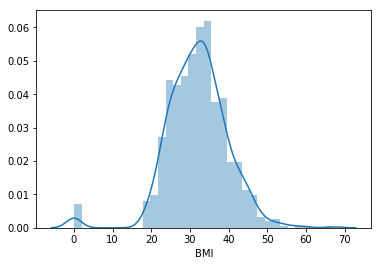

In [20]:
# % de Grasa Corporal
sns.distplot(df.BMI)

In [21]:
# Ceros en BMI
def Zeros(BMI):
    return len(df[BMI == 0])
BMI = df.BMI
Zeros(BMI)

11

Un porcentaje de grasa corporal igual a cero no es considerable un valor valido de medición, por lo que tambien  se reemplazaran por la media.


In [22]:
# Reemplazo dde los ceros
df.BMI = df.BMI.replace(0, df.BMI.mean() )


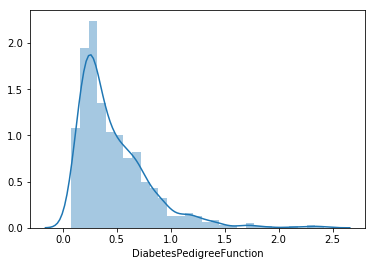

In [23]:
#PedigreeFunction
sns.distplot(df.DiabetesPedigreeFunction)

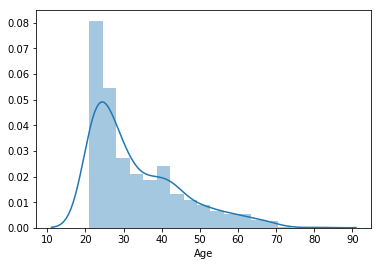

In [24]:
# Age
sns.distplot(df.Age)

Aunque no existen valores NaN en el dataset, existen valores cero que se pueden deber a una no lectura de esos valores y no a un valor cierto, como es el caso de las Columnas Insulin,Glucose,SkinThickness,BMI. 
Para adecuar el dataset se remplazaron los valores ceros por la media, sin embargo en el caso de la columna Insuline se eliminara debido al alto numero de valores cero.

In [25]:
# Eliminando colunma cero
df = df.drop(['Insulin'], axis = 1)


In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,43.1,2.288,33,1


In [27]:
# Defino X,y

X, y = df.drop(['Outcome'], axis = 1)  , df.iloc[:,7]


In [28]:
#Normalizo las variables
from sklearn import preprocessing
from  sklearn.preprocessing  import  StandardScaler 
normalizador =  StandardScaler().fit(X)
X_norm = normalizador.transform(X)
X_norm.shape


C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sando\.conda\envs\ds\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


(768, 7)

In [29]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,33.6,0.627,50
1,1,85.0,66.0,29.000000,26.6,0.351,31
2,8,183.0,64.0,20.536458,23.3,0.672,32
3,1,89.0,66.0,23.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,43.1,2.288,33


In [30]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Entrenamiento de modelos

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 12)

# Dividido el data set para los entrenamientos, empezaremos a evaluar diferentes modelos.

## Linear SVM

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import LinearSVC
param_grid = [{ 'C' : [0.001, 0.01, 0.1, 1, 10] , 'loss': ['hinge' , 'squared_hinge']}]
linear_svc = LinearSVC(random_state=0, tol=1e-5)
grid_search = GridSearchCV (linear_svc, param_grid, cv = 5 , scoring = 'roc_auc', return_train_score = True )
grid_search.fit(X_train,y_train)

C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'loss': ['hinge', 'squared_hinge']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [33]:
Parametros = pd.DataFrame(grid_search.cv_results_['params'])
Score_Train = pd.Series(grid_search.cv_results_['mean_train_score'])
Score_Test = pd.Series(grid_search.cv_results_['mean_test_score'])
grid_score = pd.concat([Parametros,Score_Train.rename('mean_train_score') ,Score_Test.rename('mean_test_score')] ,  axis=1)
grid_score

,C,loss,mean_train_score,mean_test_score
0,0.001,hinge,0.711472,0.706214
1,0.001,squared_hinge,0.724670,0.717597
2,0.010,hinge,0.727807,0.722759
3,0.010,squared_hinge,0.755345,0.745131
4,0.100,hinge,0.799427,0.782416
5,0.100,squared_hinge,0.782301,0.770124
6,1.000,hinge,0.753006,0.750411
7,1.000,squared_hinge,0.753544,0.751110
8,10.000,hinge,0.753006,0.750411
9,10.000,squared_hinge,0.753072,0.750412


In [34]:
grid_search.best_params_

{'C': 0.1, 'loss': 'hinge'}

In [35]:
optimised_svm = grid_search.best_estimator_

Automatically created module for IPython interactive environment
[[99  0]
 [55  0]]


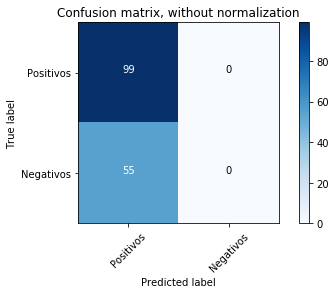

In [36]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


target_names = ['Positivos', 'Negativos']
y_pred = optimised_svm.predict(X_test)
class_names = target_names


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_test, y_pred)
    
    

    print(cm)

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

    
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [{ 'n_estimators' : [100, 500, 1000], 'max_depth' : [3, 7, None], 'min_samples_split' : [2, 3, 10] ,
              'bootstrap' :[True, False], 'criterion' : ["gini", "entropy"] }]

rnd_clf = RandomForestClassifier()
grid_search = GridSearchCV (rnd_clf, param_grid, cv = 5 , scoring = 'roc_auc', return_train_score = True )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [100, 500, 1000], 'max_depth': [3, 7, None], 'min_samples_split': [2, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [42]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_split': 3,
 'n_estimators': 100}

In [43]:
optimised_random = grid_search.best_estimator_

Automatically created module for IPython interactive environment
[[90  9]
 [20 35]]


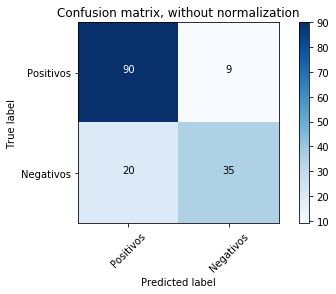

In [100]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


target_names = ['Positivos', 'Negativos']
y_pred = optimised_random.predict(X_test)
class_names = target_names


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_test, y_pred)
    
    

    print(cm)

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

    
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

## AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
     DecisionTreeClassifier(max_depth=1), algorithm="SAMME.R")

param_grid = [{ 'n_estimators' : [50, 100, 500] }]

grid_search = GridSearchCV (ada_clf, param_grid, cv = 5 , scoring = 'roc_auc', return_train_score = True )
grid_search.fit(X_train,y_train)

C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [50, 100, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [47]:
optimised_ada = grid_search.best_estimator_

Automatically created module for IPython interactive environment
[[81 18]
 [21 34]]


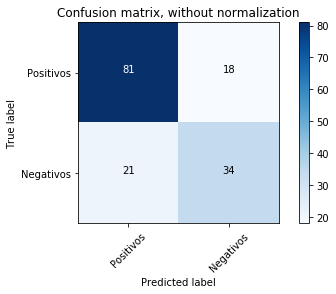

In [138]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


target_names = ['Positivos', 'Negativos']
y_pred = optimised_ada.predict(X_test)
class_names = target_names


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_test, y_pred)
    
    

    print(cm)

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

    
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

## KNN Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier( weights= 'uniform')
param_grid = [{ 'n_neighbors' : [1,480,1] }]
grid_search = GridSearchCV (KNN_clf, param_grid, cv = 5 , scoring = 'roc_auc', return_train_score = True )
grid_search.fit(X_train,y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [1, 480, 1]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [51]:
grid_search.best_params_

{'n_neighbors': 480}

In [52]:
optimised_knn = grid_search.best_estimator_

Automatically created module for IPython interactive environment
[[99  0]
 [55  0]]


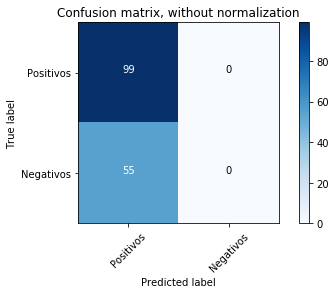

In [53]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


target_names = ['Positivos', 'Negativos']
y_pred = optimised_knn.predict(X_test)
class_names = target_names


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_test, y_pred)
    
    

    print(cm)

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

    
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

## Voting

In [158]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

rf_clf = optimised_random 
ada_clf = optimised_ada 
knn_clf = optimised_knn


voting_clf = VotingClassifier(
estimators= [('rf', rf_clf) , ('ada' , ada_clf) , ('knn', knn_clf)], voting ='hard')


for clf in (rf_clf, ada_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred_v = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred_v))

RandomForestClassifier 0.7597402597402597
AdaBoostClassifier 0.7467532467532467
KNeighborsClassifier 0.6428571428571429
VotingClassifier 0.7532467532467533


Automatically created module for IPython interactive environment
[[88 11]
 [30 25]]


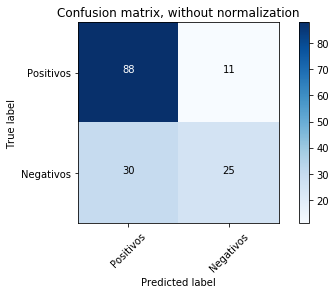

In [56]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


target_names = ['Positivos', 'Negativos']
y_pred = voting_clf.predict(X_test)
class_names = target_names


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_test, y_pred)
    
    

    print(cm)

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

    
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

### Metricas para selecciónn del modelo
Al tratarse del diagnostico de una enfermedad se deben vigilar los errores con respecto a las falsos de negativos, pues un paciente con un diagnostivo negativo quizas no vuelva a consulta y su enfermedad avanzar sin seguimiento medico apropiado considerando lo anterior consultaremos la metrica de Sensibilidad a fín de disminuir lo falsos negativos. Tambien se usara la especifidad como metrica ya que nos permite ver que numero de casos negativos fueron realmente determinados negativos.

In [159]:
def METRICS(X,y,estimator):
   
    y_pred = estimator.predict(X_test)
    cm = confusion_matrix(y_true, y_pred)
    TP, FN, FP, TN = confusion_matrix(y_true, y_pred).ravel()
    Sensibilidad =  TP/ (FN+TP)
    Especificidad = TN/(FP+TN)
    Accuracy = (TP+TN)/(TP+TN+FN+FP)

    return  Sensibilidad,Especificidad,Accuracy


In [160]:
model = optimised_svm
results = METRICS(X,y,model)
print('SVM', results)

model = optimised_random
results = METRICS(X,y,model)
print('Random Forest', results)

model = optimised_ada
results = METRICS(X,y,model)
print('Ada B', results)

model = optimised_knn
results = METRICS(X,y,model)
print('KNN', results)

model = voting_clf
results = METRICS(X,y,model)
print('Voting', results)


SVM (1.0, 0.0, 0.6428571428571429)
Random Forest (0.8686868686868687, 0.5636363636363636, 0.7597402597402597)
Ada B (0.8181818181818182, 0.6181818181818182, 0.7467532467532467)
KNN (1.0, 0.0, 0.6428571428571429)
Voting (0.8787878787878788, 0.5272727272727272, 0.7532467532467533)


### De acuerdo a los resultados de las metricas el modelo que presenta una mejor selección es Random Forest con una sensibilidad de 90.9%

In [132]:
eclf =rf_clf
from sklearn.externals import joblib
joblib.dump(eclf, 'diabetes.pkl') 

['diabetes.pkl']